Loss: 78.10643012623271
y_test stats: -1989.8739331258153 2430.8976979821186 12.865300600801746 638.6108454657225


C:\Users\shitals\AppData\Local\Temp/ipykernel_32260/2849733553.py:11: RuntimeWarning: invalid value encountered in log
  plt.scatter(x_test, np.log(y_test), color='b')
C:\Users\shitals\AppData\Local\Temp/ipykernel_32260/2849733553.py:12: RuntimeWarning: invalid value encountered in log
  plt.scatter(x_test, np.log(y_pred), color='r')


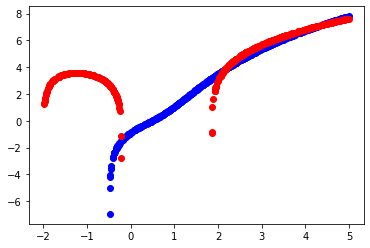

In [3]:
import matplotlib.pyplot as plt
from poly_regr import poly_regress
import numpy as np

loss, x_test, y_test, y_pred = poly_regress(ground_degree=5)

print("Loss:", loss)
print("y_test stats:", np.min(y_test), np.max(y_test), np.mean(y_test), np.std(y_test))

# Plot the data and the fitted 5th degree polynomial
plt.scatter(x_test, np.log(y_test), color='b')
plt.scatter(x_test, np.log(y_pred), color='r')
plt.show()
